# Visualizing Irrigation Data

## Cem Onel

### Libraries

In [32]:
import pandas
import numpy
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
# %matplotlib qt

MIN_MOISTURE = 1024

## Data Preparation

In [36]:
## Retrieve Data from Csv File
irrigation_data = pandas.read_csv('data/1-lowered.csv',sep='\t', encoding="ISO-8859-1")

# Time Preparation
irrigation_data['time'] = irrigation_data['time'].apply(lambda ts: ts//1000)
irrigation_data['time'] = irrigation_data['time'].apply(lambda ts: datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
irrigation_data.set_index(irrigation_data['time'], inplace=True)
# irrigation_data.set_index(pandas.DatetimeIndex(irrigation_data['time']), inplace=True)
del irrigation_data['time']

# Soil-Mosutire Percantage Calculation
irrigation_data['soil_moisture'] = irrigation_data['soil_moisture'].apply(lambda x: MIN_MOISTURE - x)
max_soil_moisture = irrigation_data['soil_moisture'].max()
irrigation_data['soil_moisture'] = irrigation_data['soil_moisture'].apply(lambda x: (x/max_soil_moisture)*100)

irrigation_data

,soil_moisture,temperature,air_humidity
time,,,
2020-02-24 17:52:31,28.461538,23.0,34.0
2020-02-24 17:58:32,33.461538,23.0,34.0
2020-02-24 18:04:32,41.153846,23.0,34.0
2020-02-24 18:10:33,51.538462,23.0,34.0
2020-02-24 18:16:33,22.307692,23.0,34.0
...,...,...,...
2020-02-25 12:47:57,4.230769,25.0,34.0
2020-02-25 12:53:57,5.000000,24.0,34.0
2020-02-25 12:59:58,4.230769,23.0,34.0


## Visualize Data

Text(0, 0.5, 'Temperature(Celcius) -- SoilHUM(%) -- AirHUM(%)')

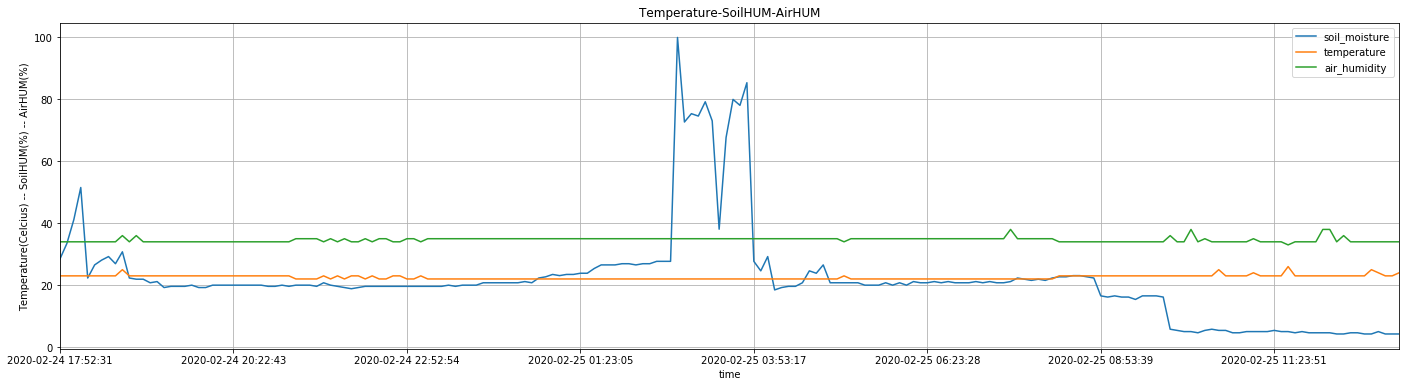

In [37]:
# register_matplotlib_converters()
plt.rcParams['figure.figsize'] = (24,6)   # Change the plot size
irrigation_data.plot(grid=True, title="Temperature-SoilHUM-AirHUM", kind="line").set_ylabel("Temperature(Celcius) -- SoilHUM(%) -- AirHUM(%)")




In [ ]:
# register_matplotlib_converters()
# fig, ax = plt.subplots()
# ax.plot(irrigation_data.index, irrigation_data.values)
# # ax.set_xticks(irrigation_data.index) 
# plt.show()